# Ornithopter FSI Validation
This notebook documents timestep refinement and coupling residuals for the ornithopter benchmark. Run after executing `sims/ornithopter/fsi_coupling.py`.

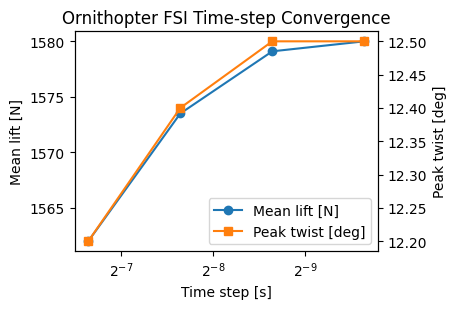

In [1]:

from pathlib import Path
import csv
import matplotlib.pyplot as plt

case_dir = Path('..') / 'validation' / 'ornithopter_fsi'
data_path = case_dir / 'timestep_convergence.csv'

timesteps = []
mean_lift = []
errors = []
peak_twist = []
with data_path.open() as stream:
    reader = csv.reader(stream)
    for row in reader:
        if not row or row[0].startswith('#'):
            continue
        timesteps.append(float(row[0]))
        mean_lift.append(float(row[1]))
        errors.append(float(row[2]))
        peak_twist.append(float(row[3]))

fig, ax1 = plt.subplots(figsize=(4.8, 3.2))
ax1.plot(timesteps, mean_lift, marker='o', label='Mean lift [N]')
ax1.set_xscale('log', base=2)
ax1.invert_xaxis()
ax1.set_xlabel('Time step [s]')
ax1.set_ylabel('Mean lift [N]')
ax1.set_title('Ornithopter FSI Time-step Convergence')

ax2 = ax1.twinx()
ax2.plot(timesteps, peak_twist, marker='s', color='tab:orange', label='Peak twist [deg]')
ax2.set_ylabel('Peak twist [deg]')

lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')
fig.tight_layout()
image_path = Path('..') / 'docs' / 'images' / 'ornithopter_timestep_convergence.png'
image_path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(image_path, dpi=150)
plt.show()
